In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [30]:
file = "../../data/raw/ENB2012_data.csv"
file_regress = "../../data/processed/regression.csv"
# file_classification = "../data/processed/classification.csv"
df =  pd.read_csv(file)
df_regress =  pd.read_csv(file_regress)
# df_class = pd.read_csv(file_classification)

### Target variables 

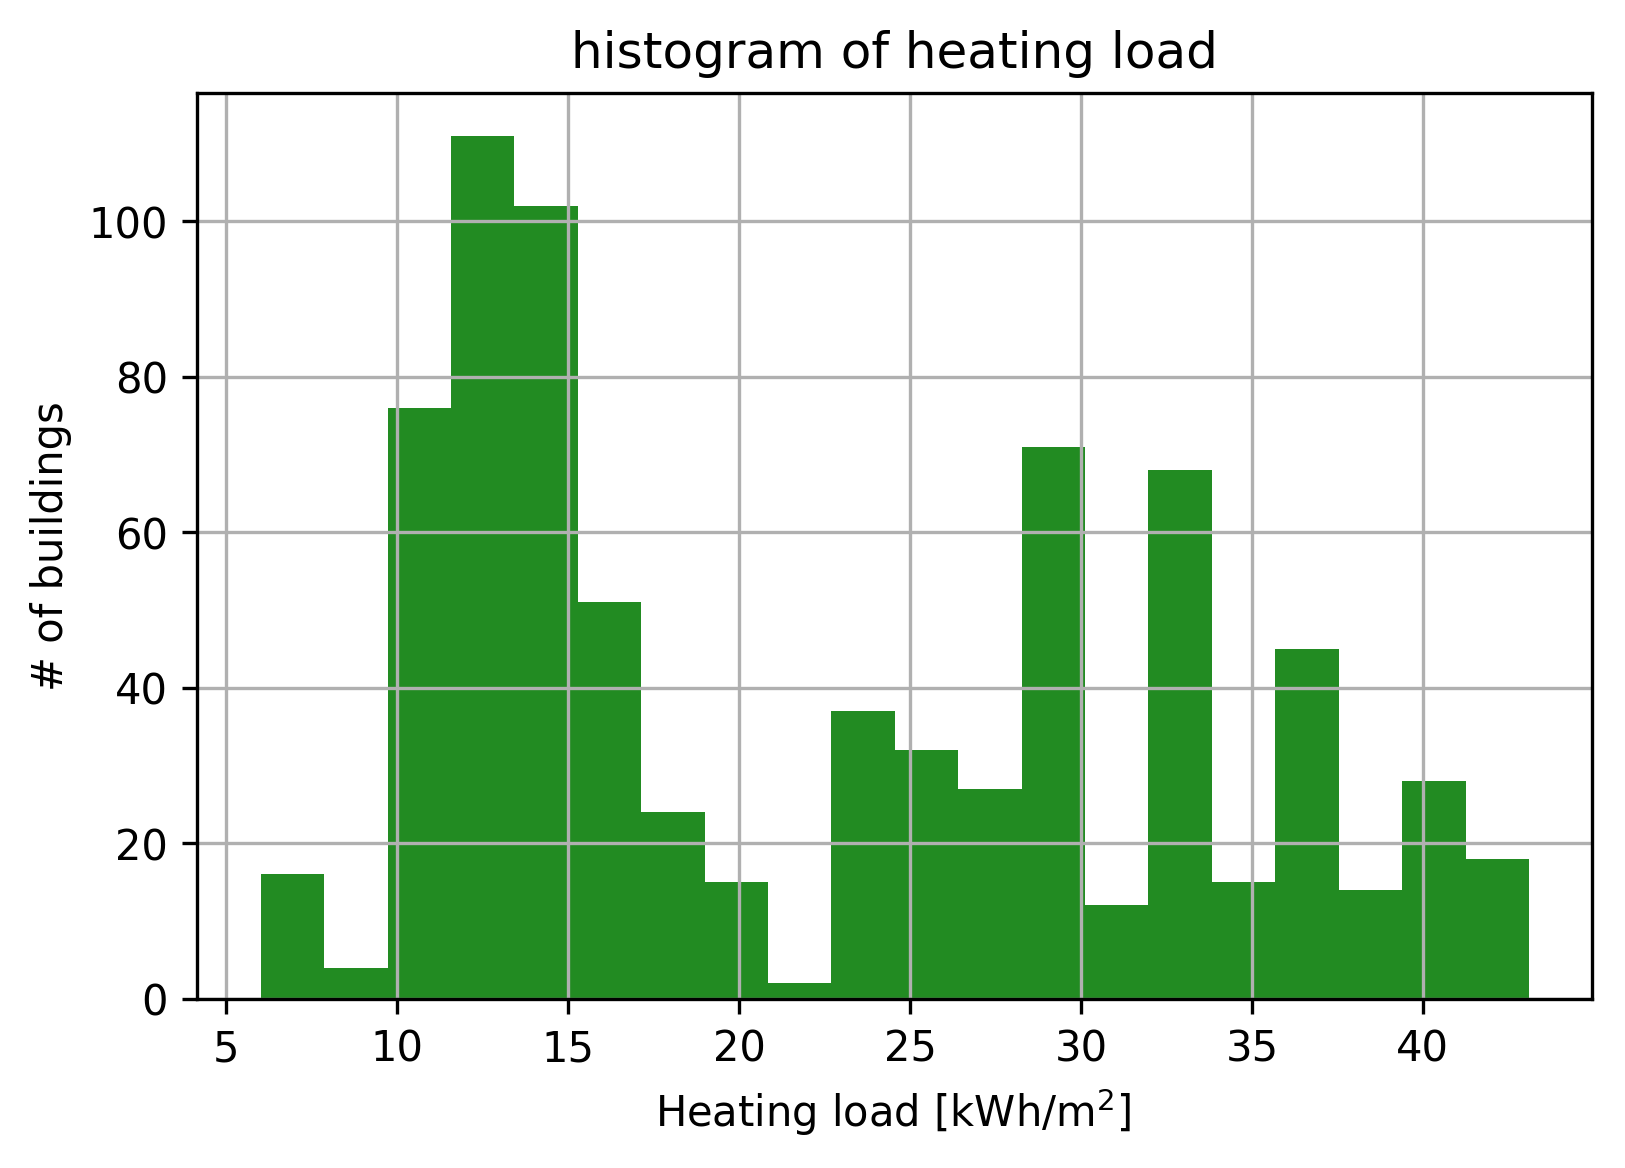

In [20]:
plt.figure(dpi=300)
df['Y1'].hist(bins=20, color='forestgreen')
plt.xlabel(r"Heating load [$\rm{kWh/m^2}$] ")
plt.ylabel("# of buildings")
plt.title("histogram of heating load")
plt.savefig("../../figures/Y1_hist.pdf")

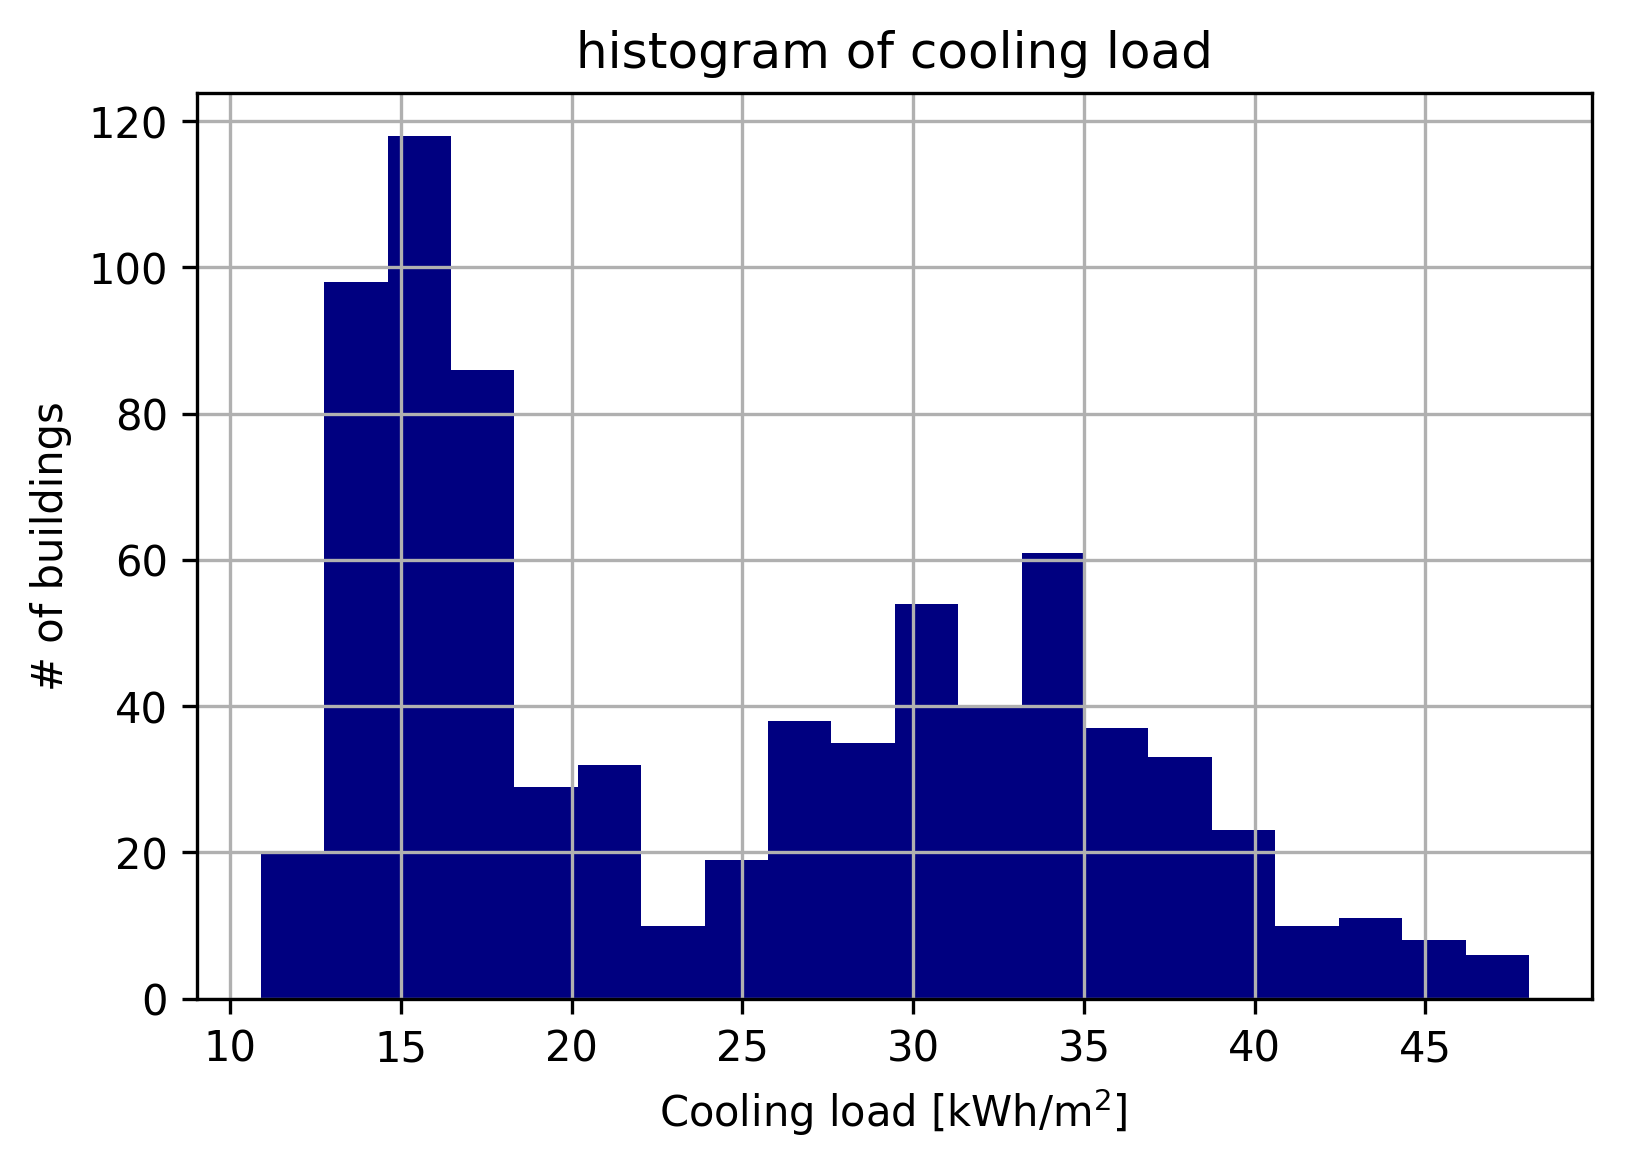

In [21]:
plt.figure(dpi=300)
df['Y2'].hist(bins=20, color='navy')
plt.xlabel(r"Cooling load [$\rm{kWh/m^2}$] ")
plt.ylabel("# of buildings")
plt.title("histogram of cooling load")
plt.savefig("../../figures/Y2_hist.pdf")

### Interaction between the target variable and features

In [22]:
from collections import OrderedDict
num_ftrs = ['X1','X2','X3','X4','X5','X7']
cat_ftrs = ['X6','X8']
target_ftrs = ['Y1', 'Y2']
dict_ftrs_names = {
    'X1' : 'Relative compactnesss', 
    'X2' : 'Surface area [m$^2$]', 
    'X3' : 'Wall area [m$^2$]', 
    'X4' : 'Roof area [m$^2$]', 
    'X5' : 'Overall height [m]', 
    'X6' : 'Orientation', 
    'X7' : 'Glazing area (fraction of floor area)', 
    'X8' : 'Glazing area distribution',
    'Y1' : r'Heating load [$\rm{kWh/m^2}$]',     
    'Y2' : r'Cooling load [$\rm{kWh/m^2}$]',     
}
ftrs_names = {
    'X1' : 'Compactnesss', 
    'X2' : 'Surface area', 
    'X3' : 'Wall area', 
    'X4' : 'Roof area', 
    'X5' : 'Overall height', 
    'X6' : 'Orientation', 
    'X7' : 'Glazing area', 
    'X8' : 'Glazing area distribution',
    'Y1' : 'Heating load',     
    'Y2' : 'Cooling load',     
}
X6_dict = OrderedDict({2:'North', 3:'East', 4:'South', 5:'West'})
# print(X6_dict.values())
X8_dict = OrderedDict({0:'Unknown', 1:'Uniform', 2:'North', 
                       3:'East', 4:'South', 5:'West'})
df.X7.unique()

array([0.  , 0.1 , 0.25, 0.4 ])

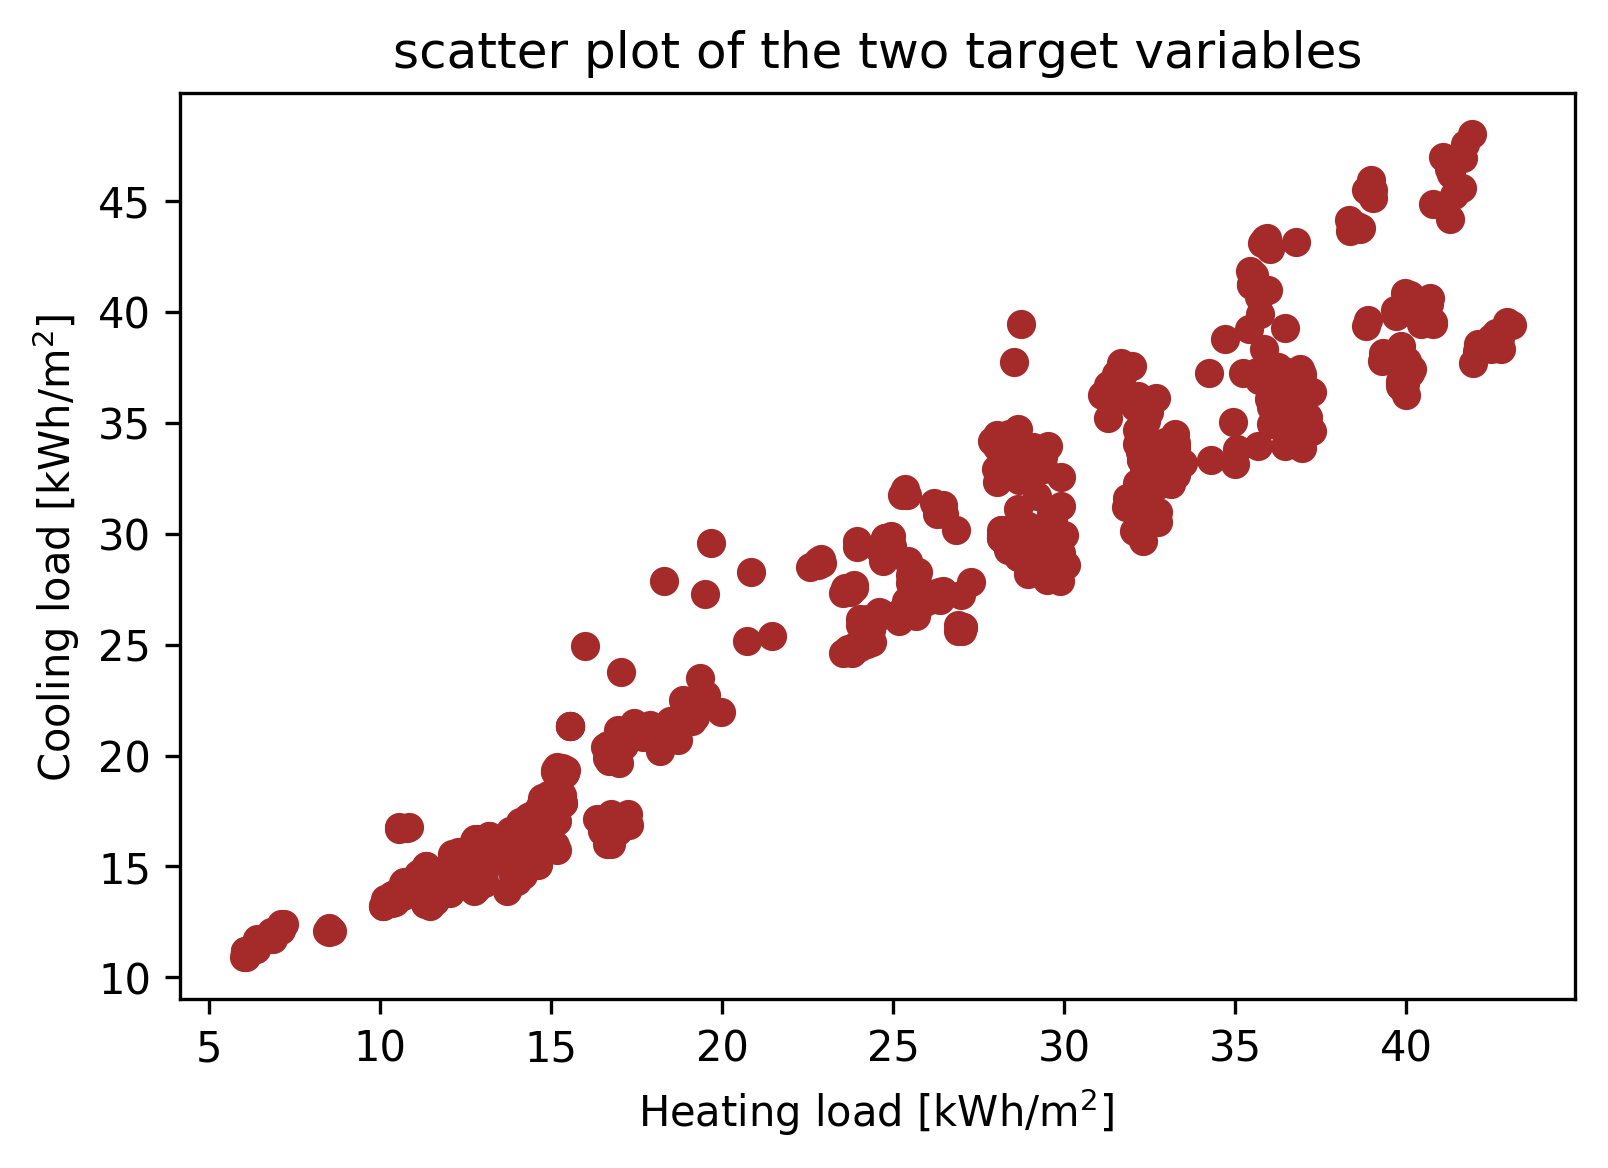

In [23]:
plt.figure( dpi=300)
plt.scatter(df['Y1'], df['Y2'], color='brown')
plt.xlabel(r"Heating load [$\rm{kWh/m^2}$] ")
plt.ylabel(r"Cooling load [$\rm{kWh/m^2}$] ")
plt.title("scatter plot of the two target variables")
plt.savefig("../../figures/Y2_vs_Y1.pdf")

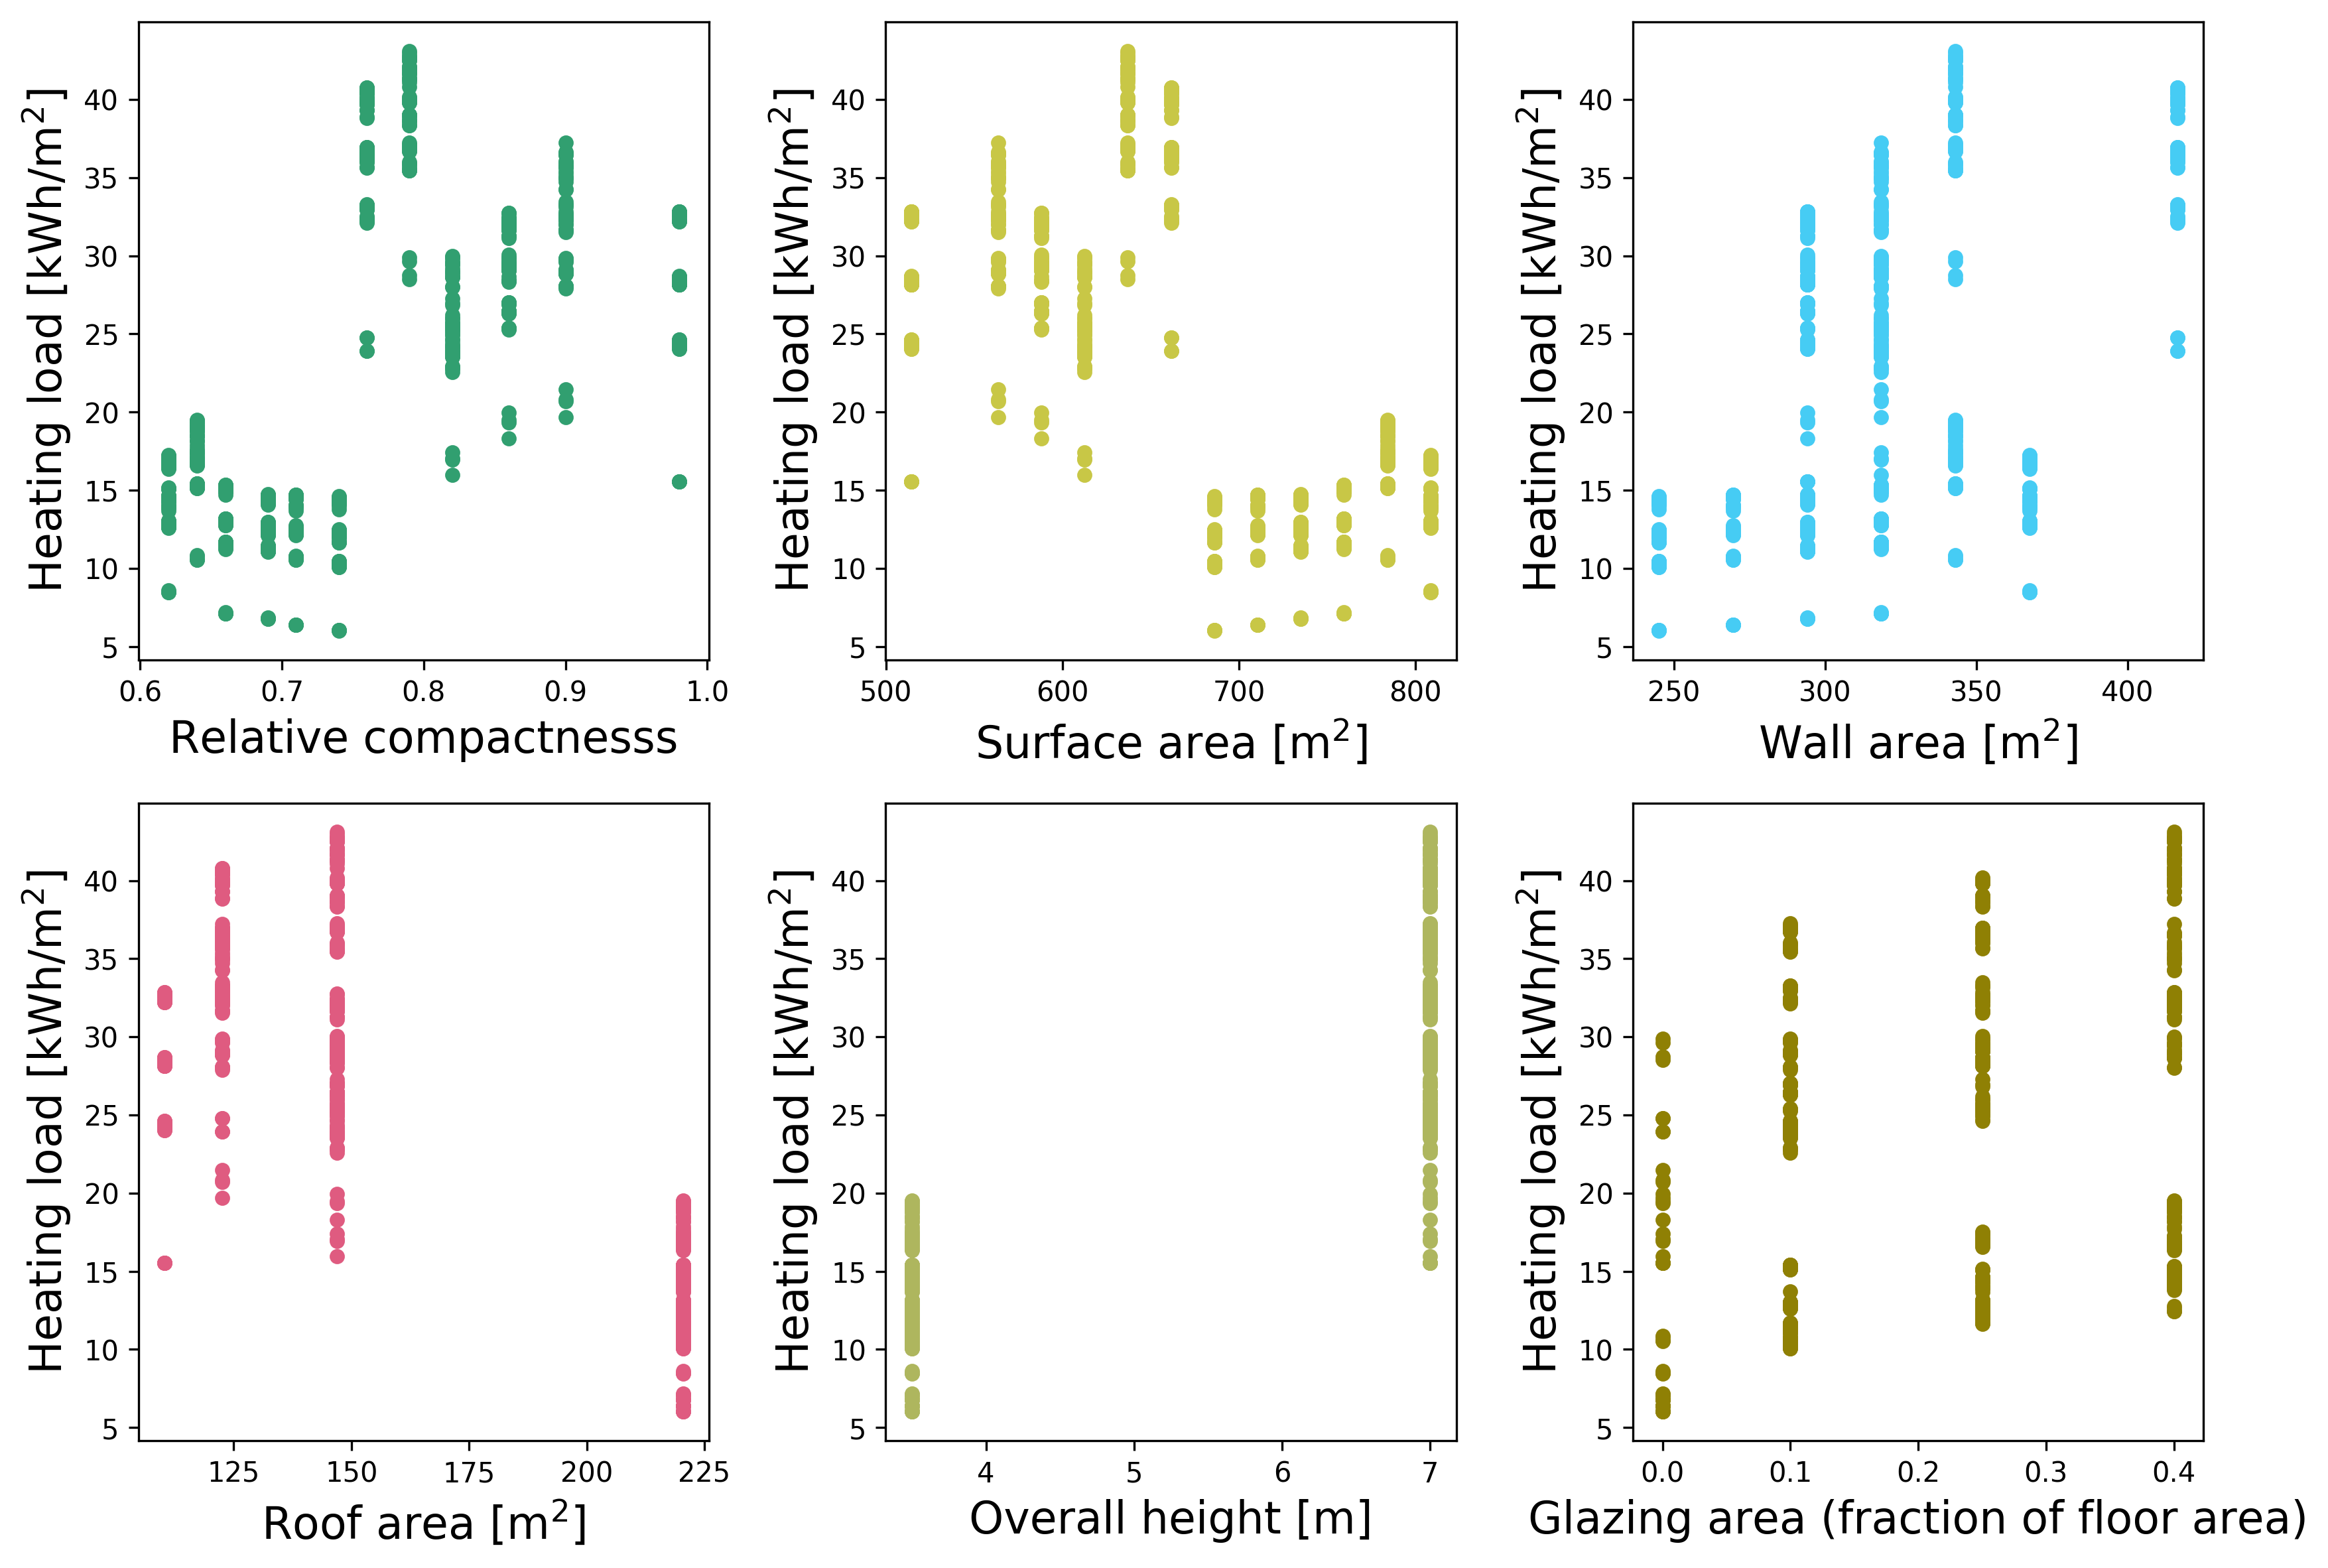

In [25]:
# 5 continuous features: scatter plots
plt.figure(figsize=(12,8),dpi=300)
label = 'Y1'
wspace = 0.2   
hspace = 0.2
plt.subplots_adjust(wspace, hspace);
np.random.seed(1234)
for i, feature in enumerate(num_ftrs):
    ax = plt.subplot(2,3,i+1)
    df.plot.scatter(feature, label, ax=ax, 
                    color=np.random.rand(3,))
#     df[[label, feature]].boxplot(by=feature, ax=ax)
    ax.set_xlabel(dict_ftrs_names[feature], fontsize=16) 
    ax.set_ylabel(dict_ftrs_names[label], fontsize=16)
    ax.set_title("")
plt.tight_layout()
plt.savefig("../../figures/Y1_vs_continuous_features.pdf")

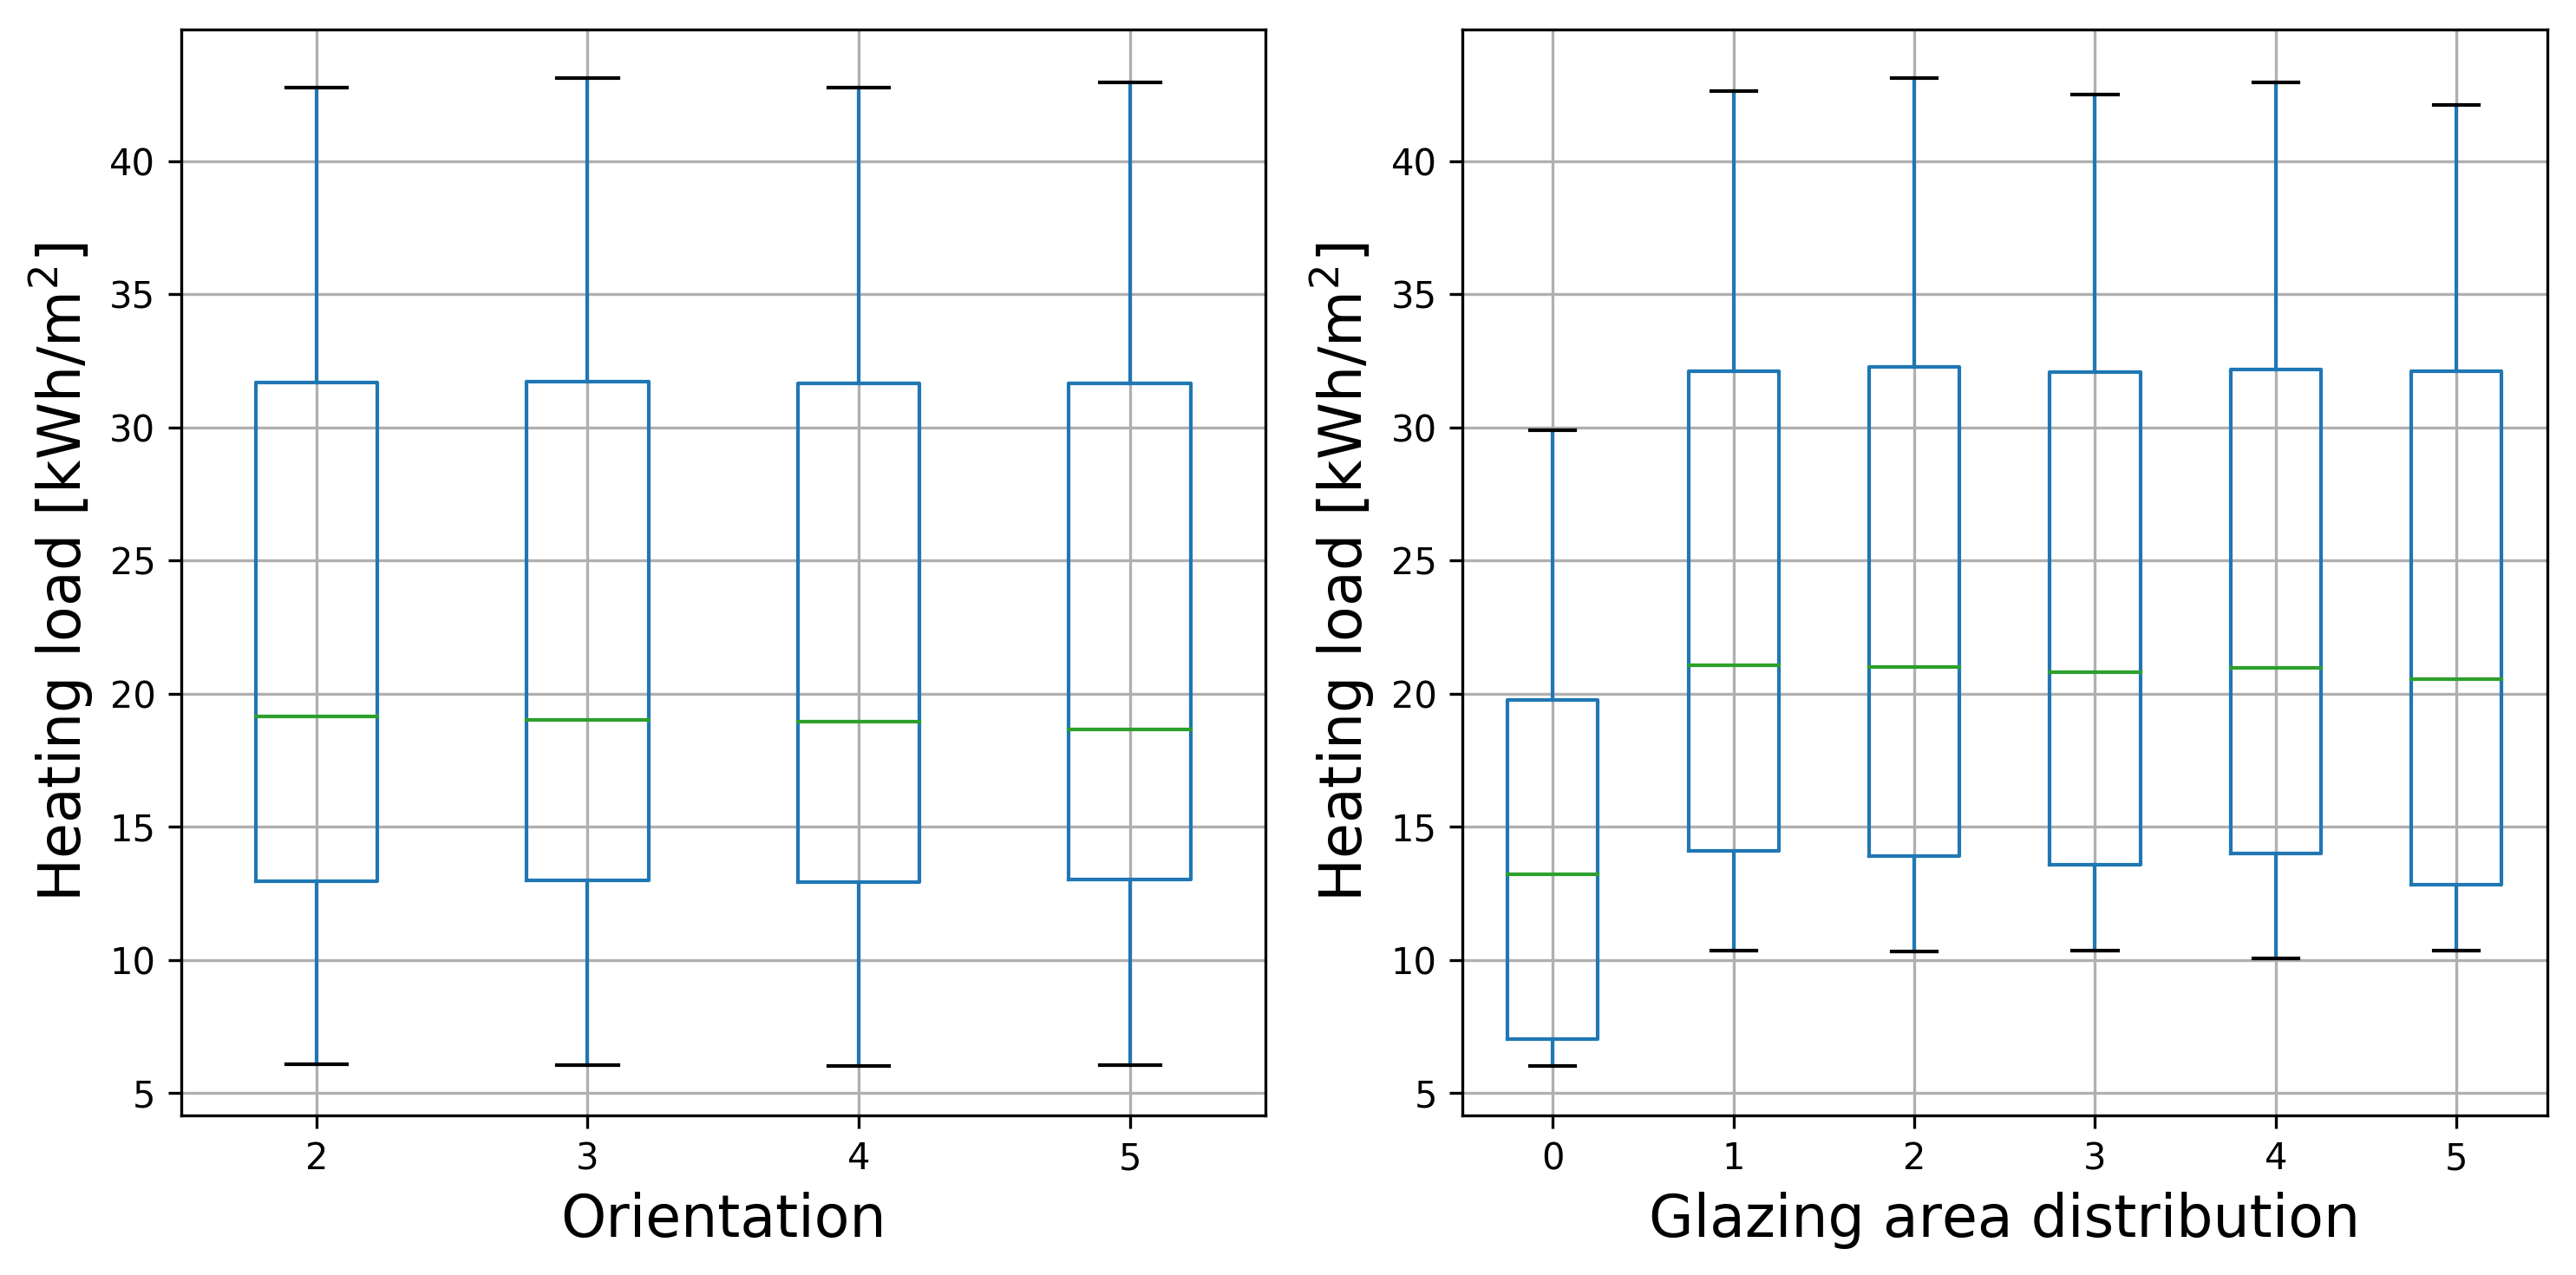

In [27]:
# 3 categorical features
plt.figure(figsize=(10,5),dpi=300)
label = 'Y1'
wspace = 0.2   
hspace = 0.2
plt.subplots_adjust(wspace, hspace);
for i, feature in enumerate(cat_ftrs):
    ax = plt.subplot(1,2,i+1)
    df[[label, feature]].boxplot(by=feature, ax=ax)
    ax.set_xlabel(dict_ftrs_names[feature], fontsize=16) 
    ax.set_ylabel(dict_ftrs_names[label], fontsize=16)
    fig = ax.get_figure()
    fig.suptitle("")
    ax.set_title("")
plt.tight_layout()
plt.savefig("../../figures/Y1_vs_categorical_features.pdf")

### Interaction between feature pairs

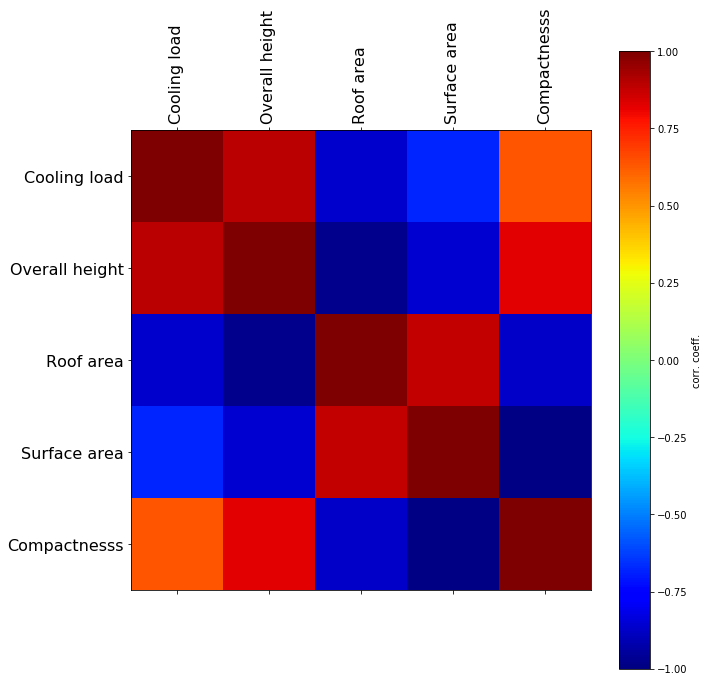

In [31]:
plt.figure(dpi=500)
# df_regress = df_regress.drop(columns='Y1')
# print(df_regress.head())
corrmat = df_regress.corr()
# use the absolute value of the correlation matrix for sorting!
all_cols = np.abs(corrmat).sort_values('Y2',ascending=False)['Y2'].index 
# all_cols = corrmat.sort_values('Y1',ascending=False)['Y1'].index 
cols = all_cols[:5] 

cm = corrmat.loc[cols,cols]

plt.figure(figsize=(10,10))
plt.matshow(cm,vmin=-1,vmax=1,cmap='jet',fignum=0)
plt.colorbar(label='corr. coeff.')
tick_names = [ftrs_names[col] for col in list(cols)]
plt.xticks(np.arange(cm.shape[0]),tick_names,
           rotation=90, fontsize=16)
plt.yticks(np.arange(cm.shape[0]),tick_names,
          fontsize=16)
plt.tight_layout()
plt.savefig("../../figures/corrmat_on_Y2-sorted.pdf")
plt.show()

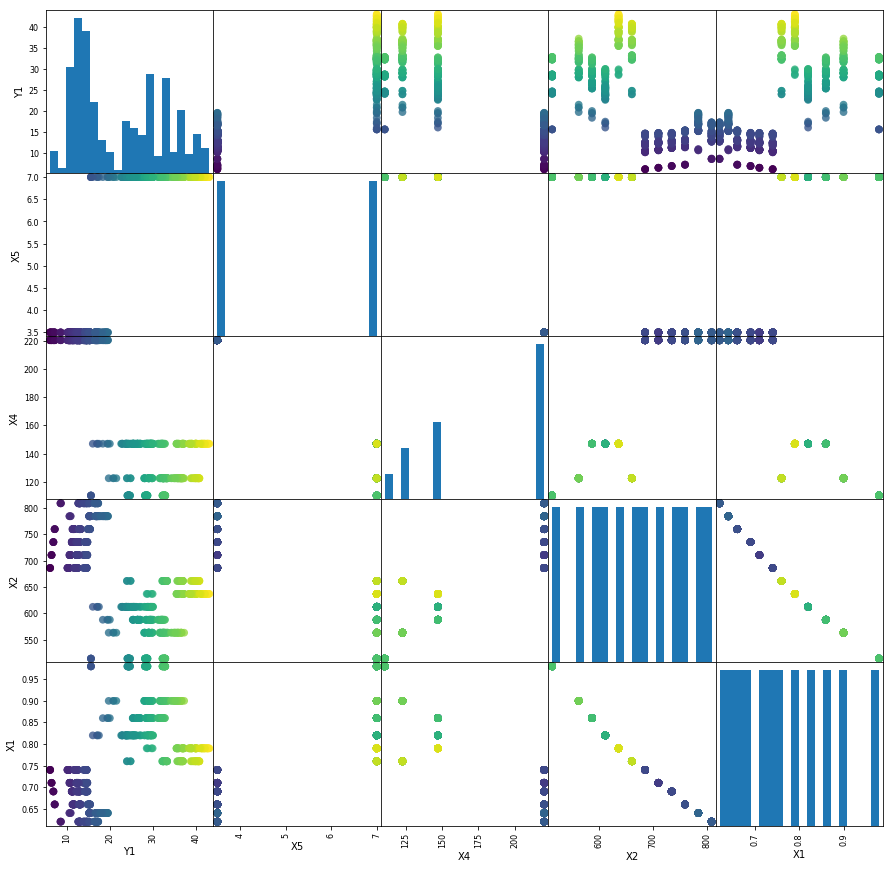

In [47]:
plt.figure(dpi=500)
corrmat = df_regress.corr()
all_cols = np.abs(corrmat).sort_values('Y1',ascending=False)['Y1'].index 
# all_cols = corrmat.sort_values('Y1',ascending=False)['Y1'].index 
cols = all_cols[:5] # positively correlated features
pd.plotting.scatter_matrix(df[cols],
                           c = df['Y1'], 
                           figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60,
                           alpha=.8,)
plt.savefig("../figures/scatter_matrix_on_Y1-sorted.png")
plt.show()